# Chapter 3: Lexicon based approaches

In [1]:
import configparser
from getpass import getuser
config = configparser.ConfigParser()
config.read(f"../config/{getuser()}.ini")
if len(config.sections()) == 0:
    config.read("config/default.ini")
DATA_PATH = config["Data"]["path"]

import os
import pandas as pd
df = pd.read_pickle(os.path.join(DATA_PATH, "df.pkl"))
print(df.shape)

(7131, 11)


## Function to show evaluation metrics

In [2]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

def evaluate(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    sns.heatmap(confusion_matrix(y_true, y_pred, labels=[-1, 0, 1]), annot=True, xticklabels=[-1, 0, 1], yticklabels=[-1, 0, 1])

## VADER (NLTK)

Accuracy: 0.30584770719394194


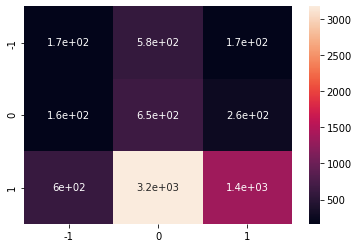

In [3]:
import nltk
nltk.download('vader_lexicon', quiet=True)
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

df_nltk = df.copy()
df_nltk["Predicted"] = df_nltk.apply(lambda x: sia.polarity_scores(x["Title"])["compound"], axis=1)
df_nltk["Predicted"] = df_nltk.apply(lambda x: 1 if x["Predicted"] > 0.1 else 0 if abs(x["Predicted"]) <= 0.1 else -1, axis=1)

evaluate(df_nltk["Sentiment"], df_nltk["Predicted"])

## TextBlob

Accuracy: 0.23096339924274295


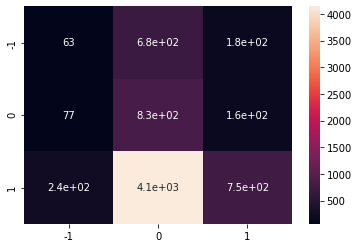

In [4]:
from textblob import TextBlob

df_textblob = df.copy()
df_textblob["Predicted"] = df_textblob.apply(lambda x: TextBlob(x["Title"]).sentiment.polarity, axis=1)
df_textblob["Predicted"] = df_textblob.apply(lambda x: 1 if x["Predicted"] > 0.1 else 0 if abs(x["Predicted"]) <= 0.1 else -1, axis=1)

evaluate(df_textblob["Sentiment"], df_textblob["Predicted"])

So, lexicon based methods failed to match the sentiments of individual investors